import sys
!{sys.executable} -m pip install pca

In [46]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import math
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import skewtest
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from pca import pca

In [47]:
mypath = './prepared_csvs'

In [48]:
files = [pd.read_csv(join(mypath, f),
                     sep=';', decimal=',',
                     index_col='country') 
         for f in listdir(mypath) if isfile(join(mypath, f))]
files

[             corruption
 country                
 Denmark            88.0
 New Zealand        88.0
 Finland            88.0
 Singapore          85.0
 Sweden             85.0
 ...                 ...
 Yemen              16.0
 Venezuela          14.0
 Somalia            13.0
 Syria              13.0
 South Sudan        11.0
 
 [180 rows x 1 columns],
                democracy
 country                 
 Canada              9.24
 United States       7.92
 Austria             8.16
 Belgium             7.51
 Cyprus              7.56
 ...                  ...
 Tanzania            5.10
 Togo                2.80
 Uganda              4.94
 Zambia              4.86
 Zimbabwe            3.16
 
 [167 rows x 1 columns],
              freedom
 country             
 Afghanistan       27
 Albania           66
 Algeria           32
 Andorra           93
 Angola            31
 ...              ...
 Venezuela         14
 Vietnam           19
 Yemen             11
 Zambia            52
 Zimbabwe          

In [49]:
df = pd.concat(files, axis=1, join='outer', ignore_index=False)
df

,corruption,democracy,freedom,GDP_UN,HDI,homicide,life_expectancy,population,religion_important
country,,,,,,,,,
Denmark,88.0,9.15,97.0,61477.0,0.940,1.0,80.9,5771876.0,0.19
New Zealand,88.0,9.25,99.0,43972.0,0.931,0.7,82.3,4783063.0,0.33
Finland,88.0,9.20,100.0,48685.0,0.938,1.6,81.9,5532156.0,0.28
Singapore,85.0,6.03,48.0,58114.0,0.938,0.2,83.6,5804337.0,0.70
Sweden,85.0,9.26,100.0,53575.0,0.945,1.1,82.8,10036379.0,0.17
...,...,...,...,...,...,...,...,...,...
Niue (New Zealand),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,NaN
Tokelau (New Zealand),NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.0,NaN
Vatican City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,799.0,NaN


In [50]:
df.isna().sum(axis=1).value_counts()

0    113
8     64
1     39
2     14
4     12
7     11
3      9
5      8
6      4
9      3
dtype: int64

I will keep only counries with data in all 8 columns.

In [51]:
df.dropna(axis=0, inplace=True); df

,corruption,democracy,freedom,GDP_UN,HDI,homicide,life_expectancy,population,religion_important
country,,,,,,,,,
Denmark,88.0,9.15,97.0,61477.0,0.940,1.0,80.9,5771876.0,0.19
New Zealand,88.0,9.25,99.0,43972.0,0.931,0.7,82.3,4783063.0,0.33
Finland,88.0,9.20,100.0,48685.0,0.938,1.6,81.9,5532156.0,0.28
Singapore,85.0,6.03,48.0,58114.0,0.938,0.2,83.6,5804337.0,0.70
Sweden,85.0,9.26,100.0,53575.0,0.945,1.1,82.8,10036379.0,0.17
...,...,...,...,...,...,...,...,...,...
Sudan,20.0,2.54,17.0,1415.0,0.510,5.1,65.3,42813238.0,0.93
Burundi,19.0,2.14,14.0,286.0,0.433,6.1,61.6,10864245.0,0.98
Turkmenistan,19.0,1.72,2.0,7104.0,0.715,4.2,68.2,5942089.0,0.80


In [52]:
df['log_pop'] = df.population.apply(math.log)

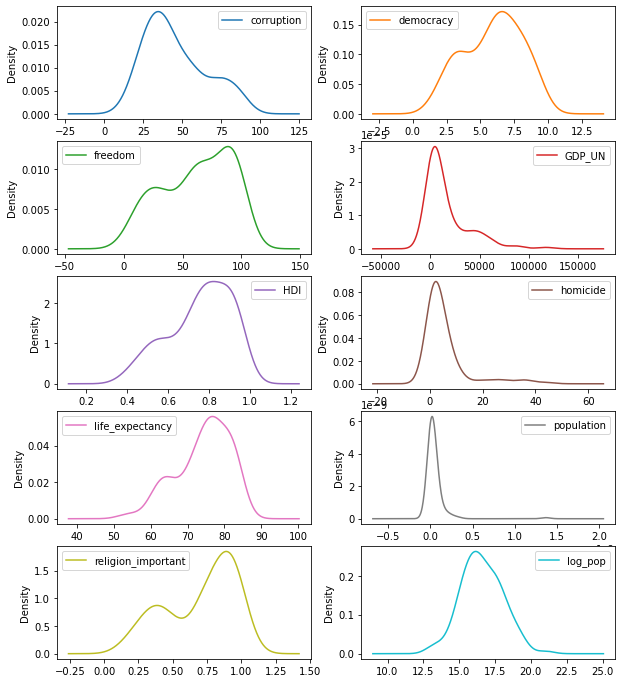

In [53]:
df.plot(kind='kde',
       subplots=True,
       sharex=False,
       sharey=False,
       layout=(5,2),
       figsize=(10, 12));

In [54]:
skew(df, axis=0)

array([ 0.64412943, -0.24820275, -0.37759166,  1.99181813, -0.60166684,
        2.81936672, -0.71068618,  8.10068198, -0.61701614,  0.16025025])

In [55]:
skewtest(df, axis=0)[1]

array([5.99158428e-03, 2.60429159e-01, 9.18134408e-02, 2.41227362e-10,
       9.64920410e-03, 1.73805179e-14, 2.77132616e-03, 8.79814165e-33,
       8.13459365e-03, 4.64280111e-01])

All distributions are skewed. I will use logarithm of population and standard scaling otherwise with mean=0, rather than median=0.

In [56]:
df.drop(columns='population', inplace=True)

In [57]:
X = scale(df, axis=0)

In [58]:
df = pd.DataFrame(X, index = df.index, columns = df.columns); df

,corruption,democracy,freedom,GDP_UN,HDI,homicide,life_expectancy,religion_important,log_pop
country,,,,,,,,,
Denmark,2.179303,1.542165,1.227743,2.062304,1.239562,-0.537611,0.934099,-2.037192,-0.713071
New Zealand,2.179303,1.589498,1.297354,1.260407,1.179606,-0.573944,1.129749,-1.478447,-0.844456
Finland,2.179303,1.565831,1.332159,1.476308,1.226239,-0.464943,1.073849,-1.677999,-0.742730
Singapore,2.024746,0.065386,-0.477729,1.908247,1.226239,-0.634501,1.311424,-0.001766,-0.709150
Sweden,2.024746,1.594231,1.332159,1.700317,1.272871,-0.525499,1.199624,-2.117012,-0.326278
...,...,...,...,...,...,...,...,...,...
Sudan,-1.323995,-1.586524,-1.556701,-0.689113,-1.625002,-0.041050,-1.246001,0.916171,0.687959
Burundi,-1.375514,-1.775854,-1.661118,-0.740832,-2.137959,0.080063,-1.763076,1.115723,-0.270861
Turkmenistan,-1.375514,-1.974651,-2.078784,-0.428502,-0.259338,-0.150051,-0.840726,0.397337,-0.692751


In [59]:
df.to_csv('df.csv')

# Principal component analysis

I will consider two versions: with and without the population column, as it is merely the size of a country but not its quality.

## With the population column

In [60]:
model = pca()
results = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


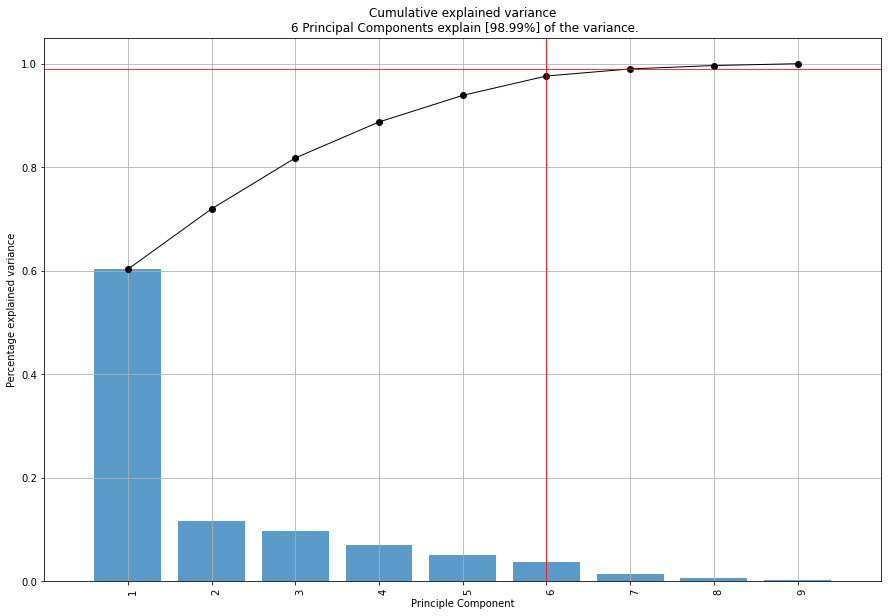

<Figure size 432x288 with 0 Axes>

In [61]:
model.plot();

In [62]:
model.results['explained_var']

array([0.60310364, 0.71964307, 0.81797296, 0.88744286, 0.93881378,
       0.97623788, 0.9899079 , 0.99648839, 1.        ])

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [113] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [113] unique colors! Available unique colors: [9].


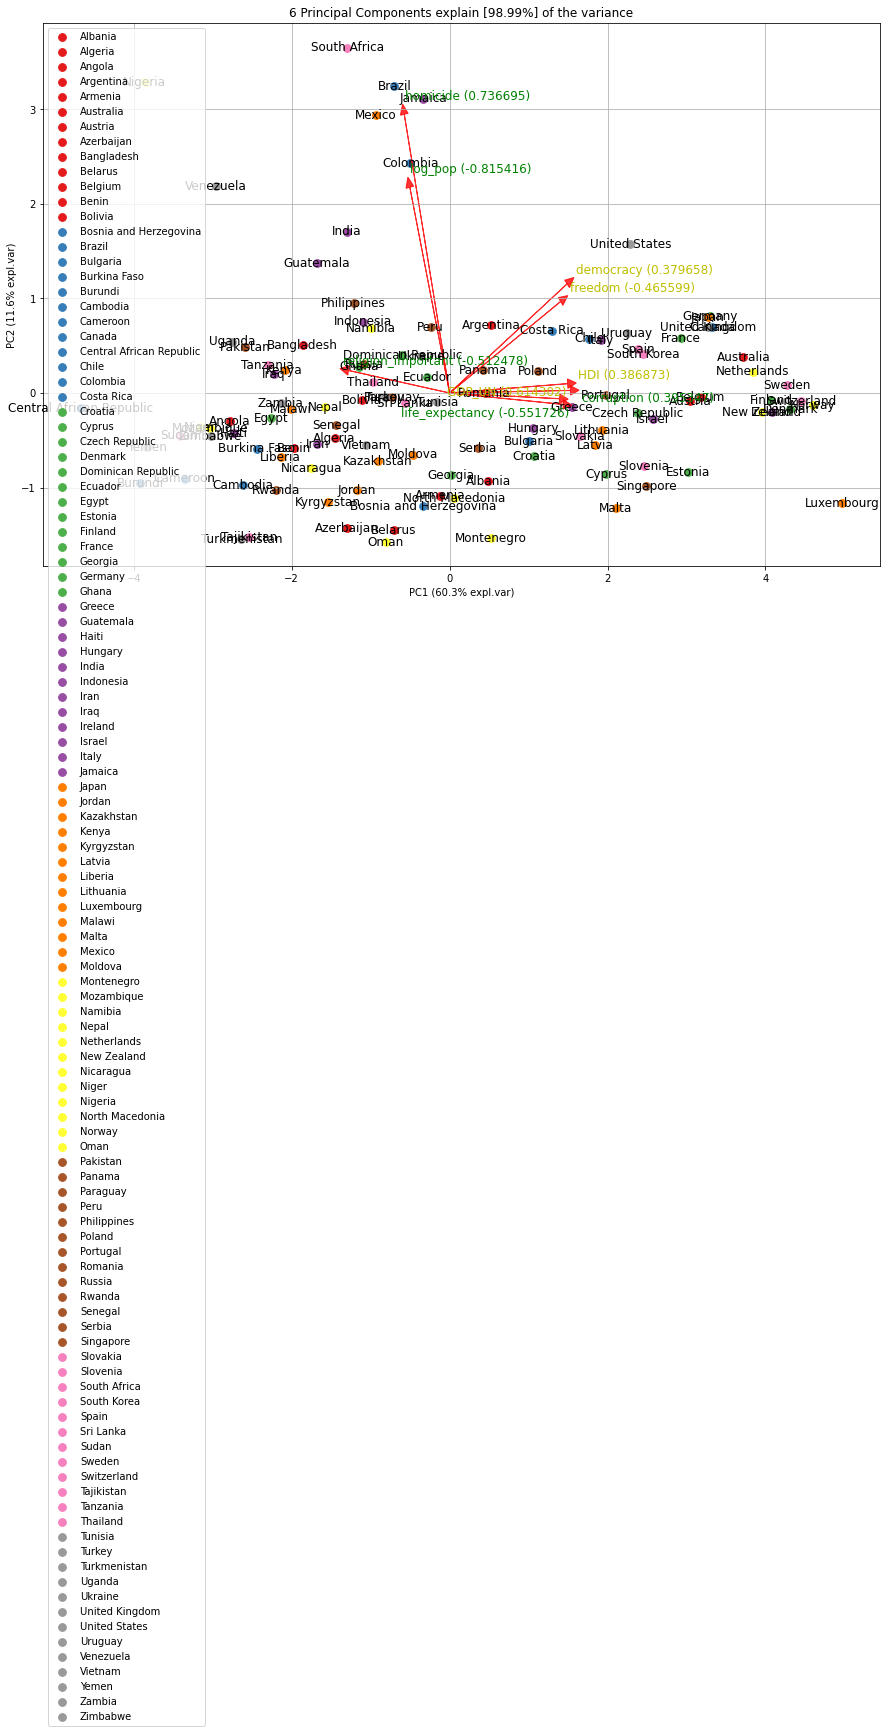

In [63]:
model.biplot();

[pca] >Plot PC1 vs PC2 with loadings.


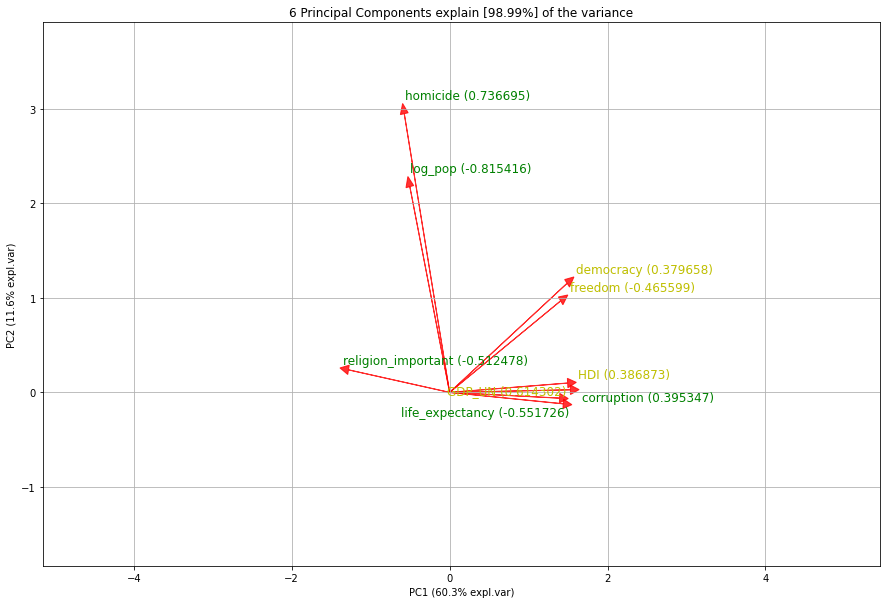

In [64]:
model.biplot(cmap=False, label=False, legend=False);

Important note: high corruption score means low corruption!

In [65]:
model.results['loadings']

,corruption,democracy,freedom,GDP_UN,HDI,homicide,life_expectancy,religion_important,log_pop
PC1,0.395347,0.379658,0.360921,0.362255,0.386873,-0.143562,0.373378,-0.334865,-0.127443
PC2,0.007139,0.294466,0.248454,-0.015740,0.025588,0.736695,-0.031299,0.062374,0.550469
PC3,-0.013480,0.103046,0.220687,-0.073115,-0.092300,0.481228,-0.145308,0.095045,-0.815416
PC4,-0.148876,-0.367874,-0.465599,0.029592,0.351402,0.406821,0.259037,-0.512478,-0.078274
PC5,0.318321,-0.109899,-0.099394,0.531467,-0.374273,0.072855,-0.551726,-0.377295,0.045997
PC6,0.102891,-0.128834,-0.283963,0.614302,0.105463,0.140530,0.221376,0.658180,-0.041650


### There is no single dominant feature. In fact, there are five variables with almost equal contribution to the 1st principal component and another variable with almost equal but opposit contribution.

In [66]:
model.results['PC']

,PC1,PC2,PC3,PC4,PC5,PC6
Denmark,4.315839,-0.170918,0.128668,0.156294,1.215609,-0.105383
New Zealand,3.953155,-0.198959,0.327397,-0.178489,0.472299,-0.218745
Finland,4.070322,-0.073885,0.271211,-0.039045,0.687483,-0.220668
Singapore,2.490263,-0.982601,-0.296501,0.522302,0.438314,1.866649
Sweden,4.268781,0.084355,-0.173187,0.196865,0.847751,-0.384664
...,...,...,...,...,...,...
Sudan,-3.419729,-0.449528,-0.601406,0.051302,0.520019,0.208263
Burundi,-3.921928,-0.953848,0.342084,-0.116432,0.874019,0.244964
Turkmenistan,-2.636468,-1.548443,0.064168,1.367045,0.126244,0.495761
Yemen,-3.827408,-0.576259,-0.322786,0.198678,0.444584,0.463260


In [67]:
model.results['PC'].to_csv('pca_with_pop.csv')

## Without the population column

In [68]:
df_2 = df.drop(columns='log_pop')
model_2 = pca()
results_2 = model_2.fit_transform(df_2)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


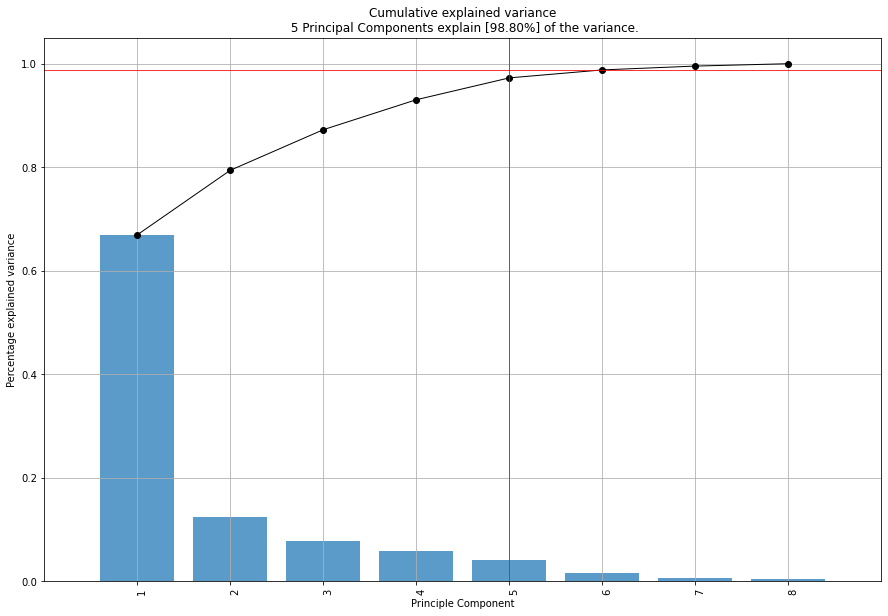

<Figure size 432x288 with 0 Axes>

In [69]:
model_2.plot();

In [70]:
model_2.results['explained_var']

array([0.66935875, 0.79407131, 0.87245904, 0.93037676, 0.97260924,
       0.98801037, 0.99543424, 1.        ])

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [113] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [113] unique colors! Available unique colors: [9].


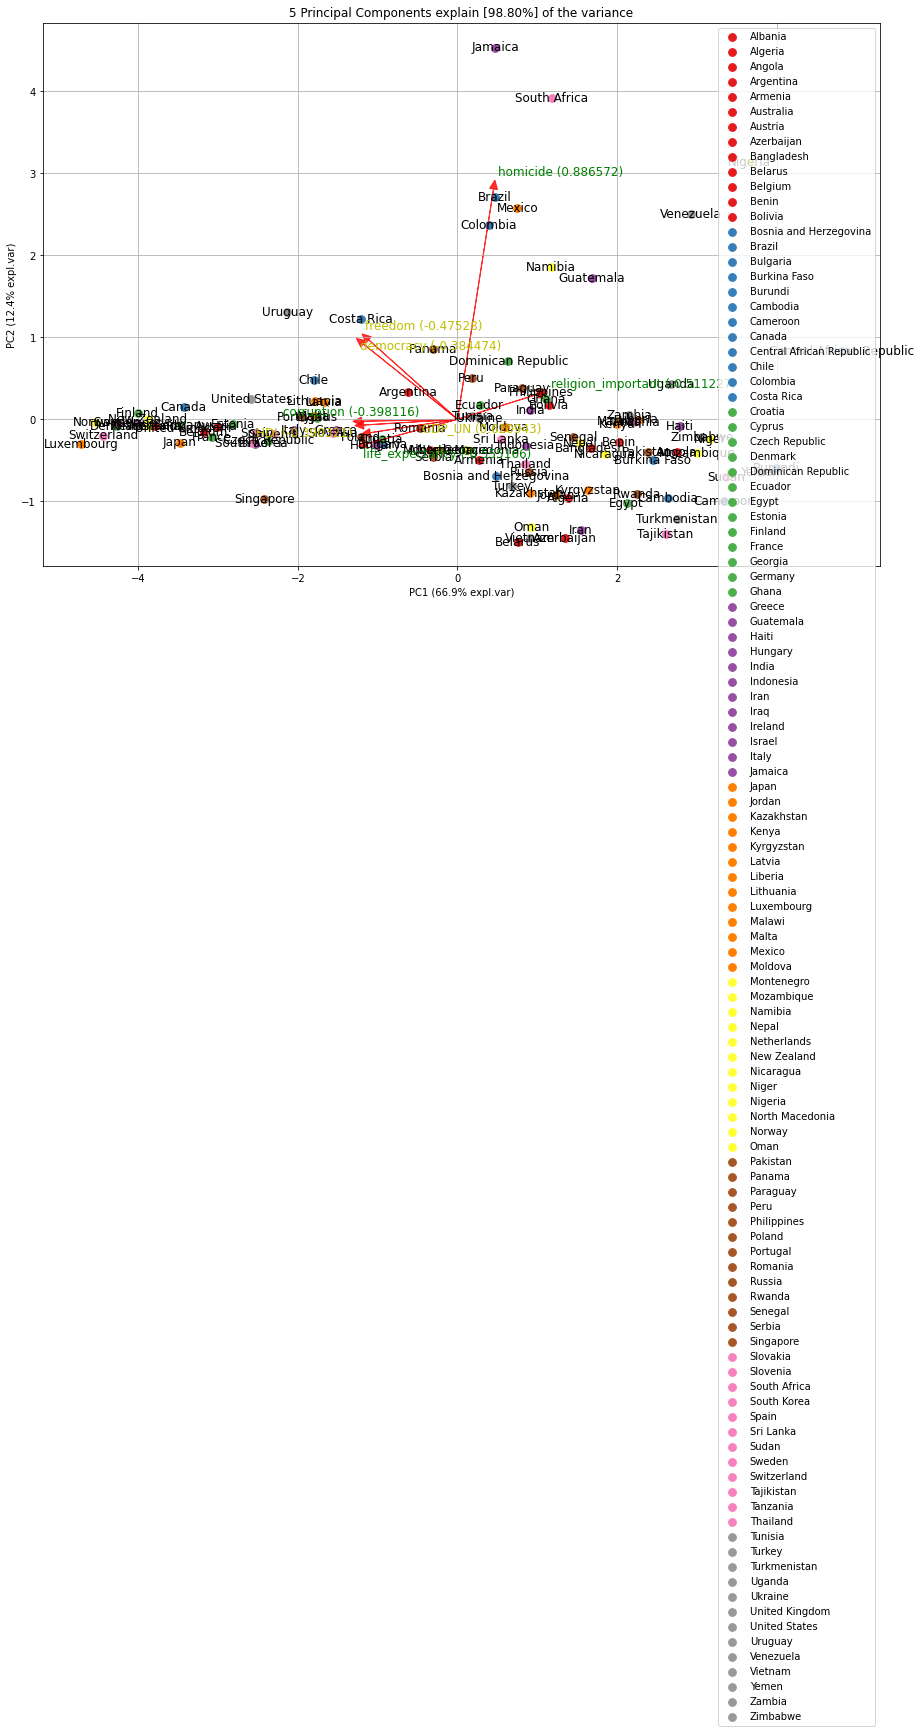

In [71]:
model_2.biplot();

[pca] >Plot PC1 vs PC2 with loadings.


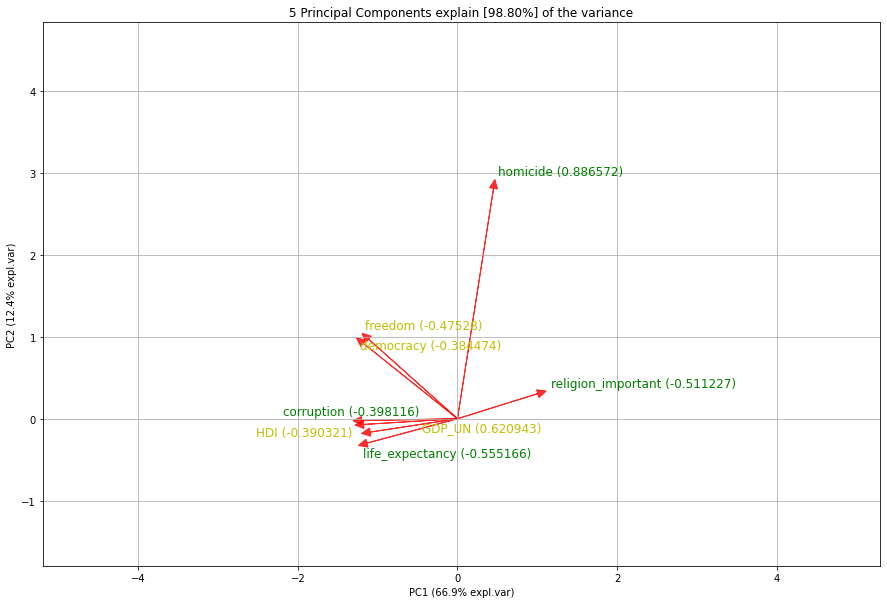

In [72]:
model_2.biplot(cmap=False, label=False, legend=False);

Important note: high corruption score means low corruption!

In [73]:
model_2.results['loadings']

,corruption,democracy,freedom,GDP_UN,HDI,homicide,life_expectancy,religion_important
PC1,-0.398116,-0.384474,-0.363189,-0.365248,-0.390321,0.142546,-0.376822,0.337204
PC2,-0.007667,0.299830,0.316576,-0.054541,-0.023172,0.886572,-0.098996,0.102475
PC3,-0.149780,-0.362817,-0.475280,0.032950,0.360196,0.392056,0.272306,-0.511227
PC4,0.315985,-0.117201,-0.095472,0.524030,-0.374582,0.081317,-0.555166,-0.384136
PC5,0.105623,-0.120703,-0.288699,0.620943,0.102363,0.134434,0.218832,0.654919


### There is no single dominant feature. In fact, there are five variables with almost equal contribution to the 1st principal component and another variable with almost equal but opposit contribution.

In [74]:
model_2.results['PC']

,PC1,PC2,PC3,PC4,PC5
Denmark,-4.259093,-0.084716,0.130032,1.227324,-0.105004
New Zealand,-3.876772,0.002315,-0.214857,0.491164,-0.231022
Finland,-4.008061,0.075104,-0.069374,0.702838,-0.227648
Singapore,-2.418540,-0.972187,0.513881,0.439412,1.854850
Sweden,-4.261533,-0.039620,0.202593,0.844482,-0.371665
...,...,...,...,...,...
Sudan,3.361032,-0.702270,0.082010,0.500246,0.228665
Burundi,3.990765,-0.597979,-0.173760,0.901424,0.225418
Turkmenistan,2.748941,-1.219311,1.312042,0.169758,0.456655
Yemen,3.806265,-0.647156,0.205493,0.438826,0.468995


In [75]:
model_2.results['PC'].to_csv('pca_without_pop.csv')